# Import Libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess

## Load Dataset

In [17]:
TRAIN_PATH = '/kaggle/input/fresh-and-stale-classification/dataset/Train'
TEST_PATH = '/kaggle/input/fresh-and-stale-classification/dataset/Test'

## View data

In [18]:
# Image target size (224x224 px)
# 32 samples per bacth

img_height= 224
img_width = 224
batch_size = 32

In [19]:
training_dataset = tf.keras.utils.image_dataset_from_directory( 
    TRAIN_PATH, 
    validation_split=0.2, 
    subset= 'training', 
    seed = 256, 
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 23619 files belonging to 18 classes.
Using 18896 files for training.


In [20]:
validation_dataset = tf.keras.utils.image_dataset_from_directory( 
    TRAIN_PATH, 
    validation_split=0.2, 
    subset= 'validation', 
    seed = 256, 
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 23619 files belonging to 18 classes.
Using 4723 files for validation.


In [21]:
class_names = training_dataset.class_names
print(class_names)

['freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']


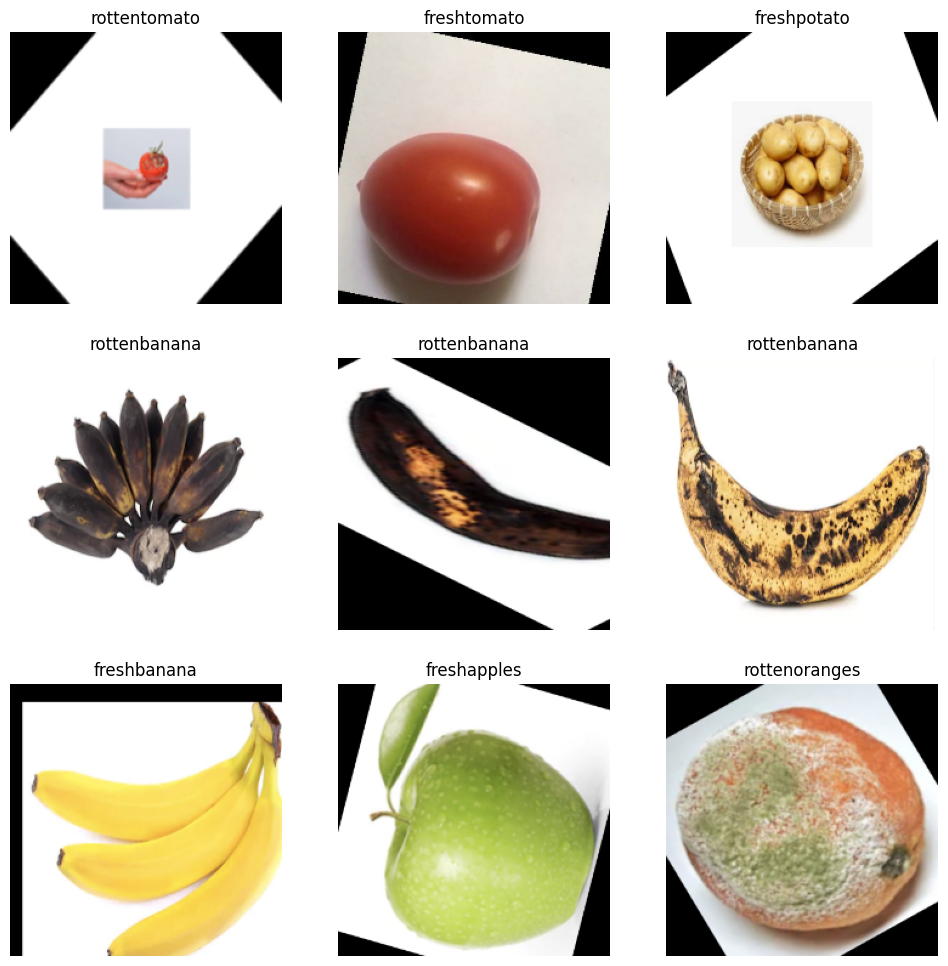

In [12]:
plt.figure(figsize=(12, 12))
for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model Training
## Data Generator

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        shear_range=0.2,
        validation_split=0.2,
        rotation_range=20,
        horizontal_flip=True,
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator =  train_datagen.flow_from_directory(
        TRAIN_PATH,
        target_size=(img_height,img_width),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode='categorical',
        subset='training')

validation_generator =  train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 18901 images belonging to 18 classes.
Found 4718 images belonging to 18 classes.


## Sequential Model

In [ ]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(img_height, img_width, 3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),  
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.fit(
    train_generator,
    steps_per_epoch=80,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=20,
)

In [ ]:
model.save("model_ska.h5", "/kaggle/working")

# Load and Test model from .h5

In [22]:
# entah knp sessionnya mati
model = tf.keras.models.load_model('/kaggle/working/model_ska.h5')

In [23]:
test_apple_url = "/kaggle/input/fresh-and-stale-classification/dataset/Test/freshbanana/Screen Shot 2018-06-12 at 10.00.37 PM.png"
img = tf.keras.utils.load_img(test_apple_url, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch

predictions_apple = model.predict(img_array)
score_apple = tf.nn.softmax(predictions_apple[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_apple)], 100 * np.max(score_apple))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
This image most likely is a freshbanana with a 13.79 percent confidence.
